In [23]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolTransforms

In [13]:
bipy=Chem.MolFromSmiles('C1(C2=NCCO2)=NC=CC=C1')

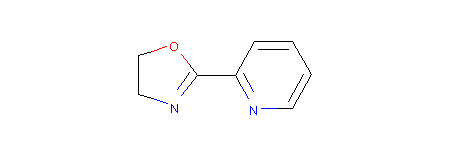

In [14]:
bipy

In [15]:
#a function to draw the molecule with the atom index
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

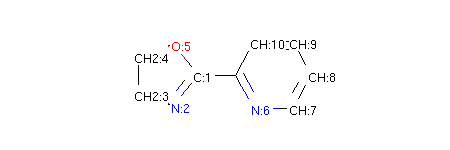

In [20]:
#lets apply to see the ligand again
mol_with_atom_index(bipy)

In [24]:
#a function to calculate bond angles
#when it fails to have optimized structure it skips to next molecule

def angCalc(mol, i, j, k):
    molecule=Chem.AddHs(mol)
    AllChem.EmbedMolecule(molecule)
    try:
        AllChem.UFFOptimizeMolecule(molecule, maxIters=200)
        conf=molecule.GetConformer(0)
        return rdMolTransforms.GetAngleDeg(conf, i, j, k)
    except:
        pass

In [25]:
#Lets calculate the angle between N2-C1-O5
angCalc(bipy, 2, 1, 5)

113.60289814702877

In [26]:
# a function to calculate volume of a molecule from its smile
def volCalc(smile):
    mol=Chem.MolFromSmiles(smile)
    molecule=Chem.AddHs(mol)
    AllChem.EmbedMolecule(molecule)
    try:
        AllChem.UFFOptimizeMolecule(molecule, maxIters=200)
        molecule.GetConformer(0)
        return AllChem.ComputeMolVolume(molecule)
    except:
        pass

In [27]:
volCalc('C1(C2=NCCO2)=NC=CC=C1')

164.88000000000005